<a href="https://colab.research.google.com/github/AlejandroVillazonG/Tareas_MAT277/blob/main/T1_MAT277_2023_1_P3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>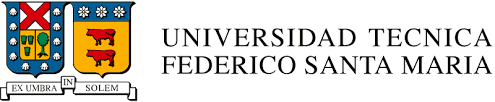</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> MAT277 ANÁLISIS NUMÉRICO DE ECUACIONES DIFERENCIALES PARCIALES - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

<H3 align='center'> Alejandro Villazón G. </H3>
<hr style="height:2px;border:none"/>



# Ejercicio 3

Sea $\Omega=(0,1)$ y $\mathcal{T}=\left\{K_1, \ldots, K_N\right\}$ una partición con $K_j=\left(x_j, x_{j+1}\right), x_j=(j-1) h, h=\frac{1}{N}$. Se define el espacio de elementos finitos de orden 2 por
$$
\mathcal{S}_0^2(\mathcal{T})=\left\{u \in H^1(\Omega)|u|_{K_j} \in \mathbb{P}_2, \text { y } u(0)=u(1)=0\right\}
$$
Sea $\left\{\varphi_2, \ldots, \varphi_{N-1}\right\}$ una base de funciones techo de $\mathcal{S}_0^1(\mathcal{T})$. Entonces, una base de $\mathcal{S}_0^2(\mathcal{T})$ es
$$
\left\{\varphi_2, \ldots, \varphi_{N-1}, \psi_1, \ldots, \psi_N\right\}
$$
donde
$$
\psi_j(x)= \begin{cases}\left(x-x_j\right)\left(x_{j+1}-x\right) & x \in K_j, \\ 0 & x \notin K_j\end{cases}
$$
Considere la formulación variacional del problema
$$
-u^{\prime \prime}(x)=1 \quad x \in(0,1), \quad u(0)=u(1)=0 .
$$
e implemente un código computacional en Python para calcular la aproximación de elementos finitos $u_h \in \mathcal{S}_0^2(\mathcal{T})$. Estudie el error de aproximación que se obtiene considerando $N=2^n$, con $n \in\{1, \ldots, 12\}$. ¿Que orden de convergencia puede observar?

## Solución:
Primero recordemos que la base de funciones techo de $S_0^1(\mathcal{T})$ están definidas como:
$$
\varphi_j(x)= 
\begin{cases}
  \frac{x-x_{j-1}}{x_j-x_{j-1}} & x \in K_{j-1}, \\
  \frac{x_{j+1}-x}{x_{j+1}-x_j} & x \in K_j, \\
  0 & \text{e.o.c}
\end{cases}
$$
y del laboratorio sabemos que cumplen:
*   $\int_0^1 \varphi_{j}(x)\,\mathrm{d}x = \frac{\text{base}\cdot\text{altura}}{2} = \frac{2h\cdot 1}{2} = h$
*   $\int_0^1 \varphi_i'(x)\varphi_j'(x)\,\mathrm{d}x = 0 \quad \text{si}\quad |i-j|>1$ 
*   $\int_0^1 \varphi_{j-1}'(x)\varphi_j'(x)\,\mathrm{d}x = -\frac{1}{h}$
*   $\int_0^1 \varphi_{j}'(x)\varphi_j'(x)\,\mathrm{d}x = \frac{2}{h}$
*   $\int_0^1 \varphi_{j}'(x)\varphi_{j+1}'(x)\,\mathrm{d}x = -\frac{1}{h}$



Note que la formulación variacional del problema es encontrar $u\in H_0^1(\Omega)$ tal que:

$$\int_0^1 u'(x)v'(x)\,\mathrm{d}x =\int_0^1 u'(x)v'(x)\,\mathrm{d}x - u'(x)v(x) \bigg|_0^1= \int_0^1 -u''(x)v(x)\,\mathrm{d}x = \int_0^1 v(x)\,\mathrm{d}x\quad \forall v\in H_0^1(\Omega)$$

Considerando el espacio discreto $S_0^2(\mathcal{T})$ y que podemos escribir $$u_h = \sum_{i=1}^{N-2} U_i \varphi_{i+1} + \sum_{i=1}^{N} W_i \psi_{i}$$ 
con $U_0 = U_{N-1} = 0$ donde $U = [U_1,\ldots,U_{N-2}]^\top\in\mathbb{R}^{N-2}$, $W=[W_1,\ldots,W_N]^\top \in \mathbb{R}^N$ tenemos que el problema es hallar $u_h$ tal que 

$$\int_0^1 u_h'(x)\varphi_{j+1}'(x)\,\mathrm{d}x = \int_0^1 \varphi_{j+1}(x)\,\mathrm{d}x\quad \forall j = 1,\ldots,N-2$$

$$\int_0^1 u_h'(x)\psi_j'(x)\,\mathrm{d}x = \int_0^1 \psi_j(x)\,\mathrm{d}x\quad \forall j = 1,\ldots,N$$



Note que

*   $\int_0^1 \psi_j(x)\,\mathrm{d}x = \int_{x_j}^{x_{j+1}} (x-x_j)(x_{j+1}-x)\,\mathrm{d}x = \int_0^h u(h-u)\,\mathrm{d}u = h\frac{h^2}{2}-\frac{h^3}{3} = \frac{h^3}{6}$

Además, dado que el soporte de $\psi_j$ es $K_j$ tenemos que:

* $\int_0^1 \psi_k'(x)\psi_j'(x)\,\mathrm{d}x = 0$ para todo $k\neq j$.
* $\int_0^1 \psi_j'(x)\psi_j'(x)\,\mathrm{d}x = \int_{x_j}^{x_{j+1}} [(x_{j+1}-x)-(x-x_j)]^2\,\mathrm{d}x = \int_0^h [(h-u)-u]^2\,\mathrm{d}u = h^2h-4h\frac{h^2}{2}+4\frac{h^3}{3} = \frac{h^3}{3}$
* $\int_0^1 \varphi_k'(x)\psi_j'(x)\,\mathrm{d}x = 0$ para todo $k\neq j,j+1$.
* $\int_0^1 \varphi_j'(x)\psi_j'(x)\,\mathrm{d}x = \int_{x_j}^{x_{j+1}}\frac{-1}{x_{j+1}-x_{j}} [(x_{j+1}-x)-(x-x_j)] \,\mathrm{d}x = -\frac{1}{h}\int_0^h [(h-u)-u]\,\mathrm{d}u = -\frac{1}{h} \left[ hh-h^2 \right] = 0$
* $\int_0^1 \varphi_{j+1}'(x)\psi_j'(x)\,\mathrm{d}x = \int_{x_j}^{x_{j+1}}\frac{1}{x_{j+1}-x_{j}} [(x_{j+1}-x)-(x-x_j)] \,\mathrm{d}x = \frac{1}{h} \int_0^h [(h-u)-u]\,\mathrm{d}u = \frac{1}{h} \left[ hh-h^2 \right] = 0$

De donde concluimos que en realidad, $\int_0^1 \varphi_k'(x)\psi_j'(x)\,\mathrm{d}x = 0$ para todo $k,j$. Por lo tanto, nos queda el sistema:



\begin{array}{ccc}
\begin{bmatrix}
\mathbf{A_1} & 0 \\
0 & \mathbf{A_2} \\
\end{bmatrix} &
\begin{bmatrix}
U \\
W \\
\end{bmatrix} &
=
\begin{bmatrix}
B_{1} \\
B_{2} \\
\end{bmatrix} \\
\end{array}

donde 

$\mathbf{A_1}=\frac{1}{h}\left(\begin{array}{ccccc}2 & -1 & 0 & \cdots & 0 \\ -1 & 2 & -1 & \cdots & 0 \\ \vdots & \ddots & \ddots & \ddots & \vdots \\ 0 & \cdots & -1 & 2 & -1 \\ 0 & \cdots & 0 & -1 & 2\end{array}\right)_{(N-2) \times (N-2)} \qquad \mathbf{A_2} = \frac{h^3}{3} \mathbf{I}_{N\times N}, \qquad B_1 = h\mathbf{1}_{N-2}, \qquad B_2 = \frac{h^3}{6}\mathbf{1}_{N}$


Notamos que el sistema es desacoplado, por lo que resolveremos los sistemas:
$$\mathbf{A_1} U = B_1$$
$$\mathbf{A_2} W = B_2$$

## Implementación:
Importamos las librerías necesarias:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definimos las funciones de la base de $S_0^2(\mathcal{T})$:

In [2]:
def varphi_j(x,j,nodos):
  # El índice j debe estar entre 2 y N-1.
  x_jmenos1 = nodos[j-2] 
  x_j = nodos[j-1] 
  x_jmas1 = nodos[j]
  if (x_jmenos1 <= x) and (x <= x_j):
    return (x-x_jmenos1) / (x_j - x_jmenos1)
  elif (x_j <= x) and (x <= x_jmas1):
    return (x_jmas1-x) / (x_jmas1 - x_j)
  else:
    return 0

def psi_j(x,j,nodos):
  # El índice j debe estar entre 1 y N.
  x_j = nodos[j-1] 
  x_jmas1 = nodos[j]
  if (x_j <= x) and (x <= x_jmas1):
    return (x - x_j) * (x_jmas1-x)
  else:
    return 0

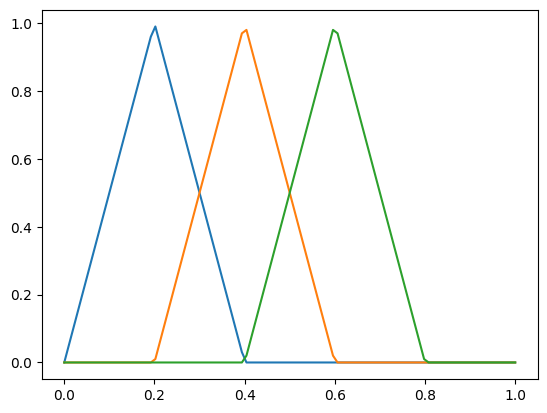

In [35]:
# ejemplo para \varphi_j
N = 5
nodos = np.linspace(0,1,N+1)
x = np.linspace(0,1,100)

for i in range(2,N):  
  plt.plot(x,[varphi_j(xx,i,nodos) for xx in x])

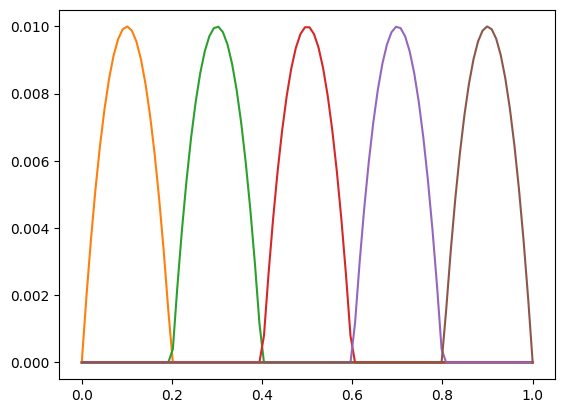

In [36]:
# ejemplo para psi_j
for j in range(N+1):
  plt.plot(x,[psi_j(xx,j,nodos) for xx in x])

Definimos las matrices y los vectores involucrados en el sistema lineal:

In [8]:
def A_1(N):
  M = np.zeros((N-2,N-2)) 
  for k in range(N-3):
    M[k,k] = 2 * N
    M[k,k+1] = -N
    M[k+1,k] = -N
  M[N-3,N-3] = 2 * N
  return M

A_2 = lambda N: 1/(3 * N**3) * np.identity(N) 

B_1 = lambda N: (1/N) * np.ones(N-2) 

B_2 = lambda N: 1/(6 * N**3) * np.ones(N) 

Definimos la aproximación de elementos finitos $u_h$,

In [16]:
def u_h(x, nodos, U, W):
  N = nodos.size - 1
  uhx = 0
  for i in range(1,N-1):
    uhx += U[i-1] * varphi_j(x,i+1,nodos)
  for i in range(1,N+1):
    uhx += W[i-1] * psi_j(x,i,nodos)
  return uhx

Notemos que la solución de la EDO: 
$$
-u^{\prime \prime}(x)=1, \quad x \in(0,1), \quad u(0)=u(1)=0 .
$$
es: $$u(x) = \frac{1}{2}x(1-x)$$

In [13]:
u = lambda x: (1/2)*(1-x)*x

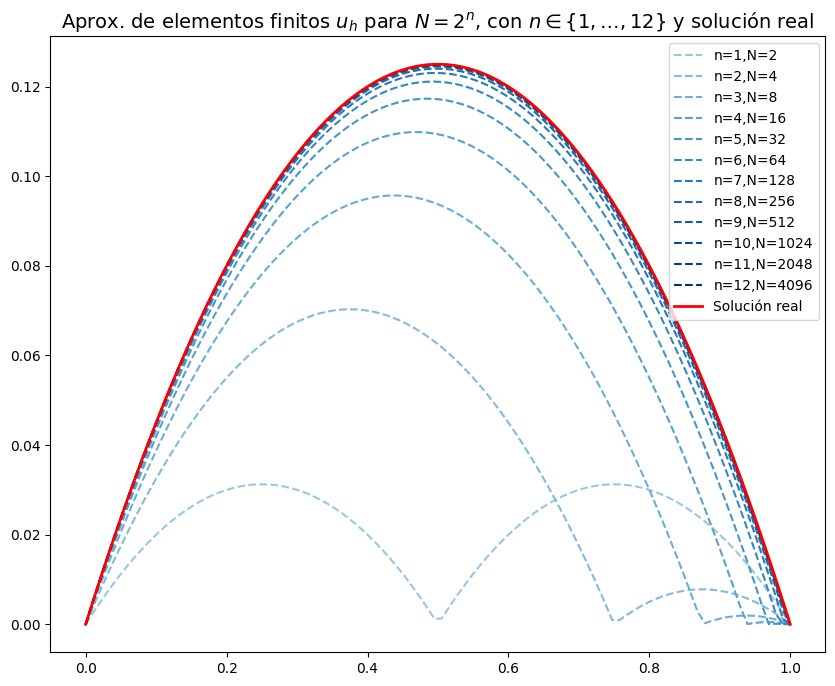

In [34]:
x = np.linspace(0,1,100)
ux = u(x) 

plt.figure(figsize = (10,8))
colormap = plt.cm.Blues 

errores = []


for n in range(1,13):
  N = 2**n
  nodos = np.linspace(0,1,N+1)
  U=0
  if N>2:
    U = np.linalg.solve(A_1(N), B_1(N))
  W = np.linalg.solve(A_2(N), B_2(N))
  u_hx = [u_h(xx,nodos, U, W) for xx in x]
  errores.append(np.linalg.norm(ux-u_hx, ord=np.inf))
  plt.plot(x,
           u_hx,
           '--', 
           label = f"{n=},{N=}",
           color = colormap((n+6)/18))

plt.plot(x,
         ux,
         linewidth = 2,
         label='Solución real',
         color = 'red')

plt.legend()
plt.title(r'Aprox. de elementos finitos $u_h$ para $N=2^n$, con $n \in\{1, \ldots, 12\}$ y solución real',
          fontsize = 14)
plt.show()

## ***Falta ver que error calculamos $L^2$?....***

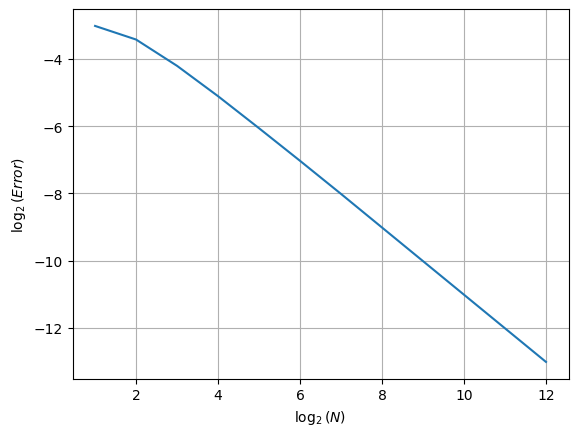

In [40]:
# Error en norma \inf
plt.plot(range(1,13), np.log2(np.array(errores)))
plt.xlabel(r'$\log_2(N)$')
plt.ylabel(r'$\log_2(Error)$')
plt.grid()

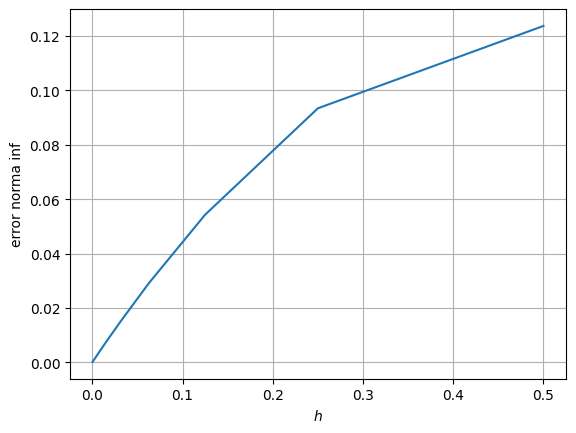

In [39]:
plt.plot(np.array([1/(2**n) for n in range(1,13)]),np.array(errores))
plt.xlabel(r'$h$')
plt.ylabel('error norma inf')
plt.grid()